In [1]:

import nltk
import re
import pyarabic
import pyarabic.araby as araby
import pyarabic.number as number
from tashaphyne.stemming import ArabicLightStemmer
from nltk.tokenize import WhitespaceTokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [2]:
def tokenization(x,idx): # take data copy
        tokens = nltk.word_tokenize(x['text'][idx])
        return tokens
def segmentation(x,idx): # take data copy 
    s_tokens = nltk.data.load('tokenizers/punkt/english.pickle')
    sentens = s_tokens.tokenize(x['text'][idx])
    x['sentenses_len'][idx] = len(sentens) #save length of sentenses in the csv "data set "  file  
    print(len(sentens))    
def drop_stop_words(x): #take data copy
    arb_stop_words = set(nltk.corpus.stopwords.words("arabic"))
    tokensOfpureTextWithoutstop=[token for token in x.split() if token not in arb_stop_words]
    return tokensOfpureTextWithoutstop
def stemming_Light(x):
    ArListem = ArabicLightStemmer()
    stemming_Light =[ArListem.light_stem(token) for token in x]
    return stemming_Light
def stemming(x):
    st = nltk.ISRIStemmer()
    stemming_root =[st.stem(token) for token in x]
    return stemming_root


In [3]:
dummyData = "أنا أعيش في قارة أفريقيا"
drop_stop_words(dummyData)

['أعيش', 'قارة', 'أفريقيا']

In [4]:
stemming_Light(drop_stop_words(dummyData))

['عيش', 'قار', 'ريقي']

In [5]:
stemming(stemming_Light(drop_stop_words(dummyData)))

['عيش', 'قار', 'ريق']

In [6]:
dummyDataTwo = ["أنا أعيش في قارة أفريقيا"]
tokenizer = WhitespaceTokenizer()
test_words = [tokenizer.tokenize(t) for t in dummyDataTwo]
# REMOVE EMOJIS FROM LIST OF WORDS
def remove_emojis(words):
    return [word for word in words if not re.search(r'[^\w\s,]', word)]

print (test_words)

[['أنا', 'أعيش', 'في', 'قارة', 'أفريقيا']]


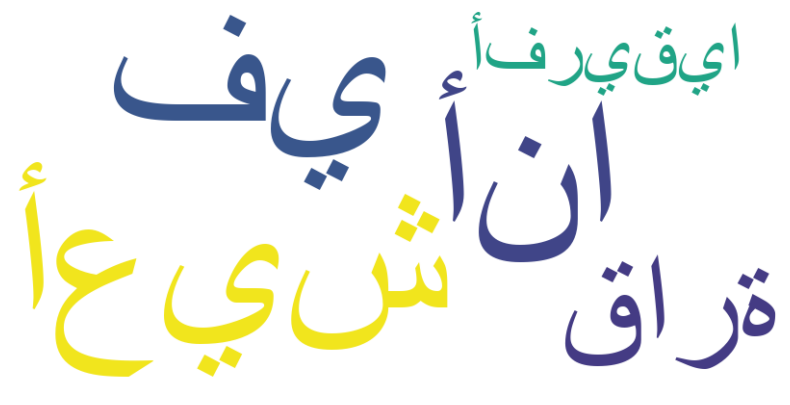

In [7]:
wordcloud = WordCloud(background_color='white', width=800, height=400,
                      font_path='arial.ttf').generate(dummyData)
# Plot the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [8]:
text = u"العـــــربية"
araby.strip_tatweel(text)

'العربية'

In [9]:
text = "الْعَرَبِيّةُ"
araby.strip_tashkeel(text)

'العربية'

In [10]:
text = u"ِاسمٌ الكلبِ في اللغةِ الإنجليزية Dog واسمُ الحمارِ Donky"
araby.tokenize(text, conditions = araby.is_arabicrange, morphs=araby.strip_tashkeel)

['اسم', 'الكلب', 'في', 'اللغة', 'الإنجليزية', 'واسم', 'الحمار']

In [11]:
number.text2number(u"خمسمئة وثلاث وعشرون")

523

In [12]:
number.number2ordinal(125)

'المئة والخامس والعشرون'